In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import xarray as xr
import numpy as np
import os
from pprint import pprint
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy 
from datetime import datetime
import cmocean
import pandas as pd
import intake
import xarray
import xesmf as xe
import cftime
import xesmf as xe

In [9]:
#from dask.distributed import Client
#client = Client(n_workers=4, processes=True, threads_per_worker=2, memory_limit='64GB')

In [11]:
ds_omon_01_rm = xr.open_dataset('ds_omon_01_rm.nc')
ds_omon_02_rm = xr.open_dataset('ds_omon_02_rm.nc')
ds_omon_03_rm = xr.open_dataset('ds_omon_03_rm.nc')
ds_omon_04_rm = xr.open_dataset('ds_omon_04_rm.nc')
ds_omon_05_rm = xr.open_dataset('ds_omon_05_rm.nc')
ds_omon_06_rm = xr.open_dataset('ds_omon_06_rm.nc')
ds_omon_07_rm = xr.open_dataset('ds_omon_07_rm.nc')
ds_omon_fa02_rm = xr.open_dataset('ds_omon_fa02_rm.nc')
ds_omon_fa03_rm = xr.open_dataset('ds_omon_fa03_rm.nc')
ds_omon_fas_rm = xr.open_dataset('ds_omon_fas_rm.nc')

ds_omon_pi_rm = xr.open_dataset('ds_omon_pi_rm.nc')
ds_omon_1p_rm = xr.open_dataset('ds_omon_1ppy_rm.nc')
ds_omon_fs_rm = xr.open_dataset('ds_omon_fafstress_rm.nc')

ds_amon_01_rm = xr.open_dataset('ds_amon_01_rm.nc')
ds_amon_02_rm = xr.open_dataset('ds_amon_02_rm.nc')
ds_amon_03_rm = xr.open_dataset('ds_amon_03_rm.nc')
ds_amon_04_rm = xr.open_dataset('ds_amon_04_rm.nc')
ds_amon_05_rm = xr.open_dataset('ds_amon_05_rm.nc')
ds_amon_06_rm = xr.open_dataset('ds_amon_06_rm.nc')
ds_amon_07_rm = xr.open_dataset('ds_amon_07_rm.nc')
ds_amon_fa02_rm = xr.open_dataset('ds_amon_fa02_rm.nc')
ds_amon_fa03_rm = xr.open_dataset('ds_amon_fa03_rm.nc')
ds_amon_fas_rm = xr.open_dataset('ds_amon_fas_rm.nc')

ds_amon_pi_rm = xr.open_dataset('ds_amon_pi_rm.nc')
ds_amon_1p_rm = xr.open_dataset('ds_amon_1ppy_rm.nc')
ds_amon_fs_rm = xr.open_dataset('ds_amon_fafstress_rm.nc')

In [13]:
ds_amon_fa02_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})
ds_omon_fa02_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})

ds_amon_fa03_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})
ds_omon_fa03_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})

ds_amon_fas_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})
ds_omon_fas_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})

<xarray.Dataset>
Dimensions:             (vertices: 4, lat: 180, lon: 360, member_id: 1, time: 1212, lev: 45)
Coordinates:
  * time                (time) object 1850-01-31 00:00:00 ... 1950-12-31 00:0...
  * member_id           (member_id) object 'r1i1p2f1'
  * lev                 (lev) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
  * lon                 (lon) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * lat                 (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (vertices, lat, lon) float64 ...
    vertices_longitude  (vertices, lat, lon) float64 ...
    hfds                (member_id, time, lat, lon) float64 ...
    so                  (member_id, time, lev, lat, lon) float64 ...
    thetao              (member_id, time, lev, lat, lon) float64 ...
    wfo                 (member_id, time, lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear

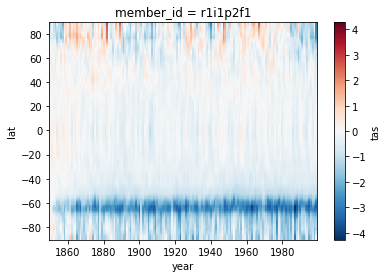

In [24]:
( ds_amon_04_rm.groupby('time.year').mean(dim='time') -
 ds_amon_pi_rm.mean(dim='time')).mean(dim='lon').tas.T.plot()

In [25]:
def gmst(ds_exp, ds_ctl, ax, label='', scale=1):
    weights = np.cos(np.deg2rad(ds_ctl.lat))
    weights.name = "weights"
    
    ds_ctl_w = (ds_ctl.tas.mean(dim='time') -273.16).weighted(weights) 
    ds_exp_w = (ds_exp.tas.resample(time='5A').mean() -273.16).weighted(weights) 
    ((ds_exp_w.mean(dim=('lon', 'lat')) - ds_ctl_w.mean(dim=('lon', 'lat')))*scale).plot(ax=ax, label=label)

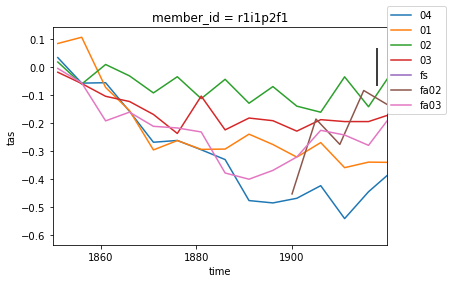

In [26]:
fig, ax = plt.subplots(1,1)
gmst(ds_amon_04_rm, ds_amon_pi_rm, ax, label='04')
gmst(ds_amon_01_rm, ds_amon_fs_rm, ax, label='01')
gmst(ds_amon_02_rm, ds_amon_fs_rm, ax, label='02')
gmst(ds_amon_03_rm, ds_amon_fs_rm, ax, label='03')
gmst(ds_amon_fs_rm, ds_amon_fs_rm, ax, label='fs')

gmst(ds_amon_fa02_rm.sel(member_id='r2i1p2f1'), ds_amon_fs_rm, ax, label='fa02')
gmst(ds_amon_fa03_rm.sel(member_id='r3i1p2f1'), ds_amon_fs_rm, ax, label='fa03')
ax.set_xlim(cftime.datetime(1850,1,1), cftime.datetime(1919,12,31))
ax.legend(loc=(1,0.6))
std = (ds_amon_pi_rm.tas.resample(time='5A').mean() -273.16).mean(dim=('lon','lat')).std(dim='time')
_=ax.errorbar(-30000, 0, yerr=std, color='k')

In [27]:
def gmwfo(ds_exp, ds_ctl, ax, label='', scale=1):
    weights = np.cos(np.deg2rad(ds_ctl.lat))
    weights.name = "weights"
    
    ds_ctl_w = (ds_ctl.tas.mean(dim='time') -273.16).weighted(weights) 
    ds_exp_w = (ds_exp.tas.resample(time='5A').mean() -273.16).weighted(weights) 
    ((ds_exp_w.mean(dim=('lon', 'lat')) - ds_ctl_w.mean(dim=('lon', 'lat')))*scale).plot(ax=ax, label=label)

In [28]:
def sst_sss(ds_exp, ds_ctl):
    fig, (axl, axr) = plt.subplots(1,2, figsize=(14,6),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=200)))

    (ds_exp.isel(lev=0).mean(dim='time') - 
     ds_ctl.isel(lev=0).mean(dim='time')).thetao.plot(ax=axl, transform=ccrs.PlateCarree(), 
                                                      cbar_kwargs=dict(shrink=0.5, label=r'$^{\circ}$C'), 
                                                      vmin=-2, vmax=2, cmap='RdBu_r')

    (ds_exp.isel(lev=0).mean(dim='time') - 
     ds_ctl.isel(lev=0).mean(dim='time')).so.plot(ax=axr, vmin=-1,vmax=1, 
                                                         cmap='RdBu_r', transform=ccrs.PlateCarree(), 
                                                         cbar_kwargs=dict(shrink=0.5, label=''))

    for ax in [axl, axr]:
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.set_global()
        ax.set_title('')

In [ ]:
sst_sss(ds_omon_fas_rm.sel(time=slice('1920','1950')), ds_omon_fs_rm)
plt.savefig('sst_sss_fas-fs.png', bbox_inches='tight', dpi=300)

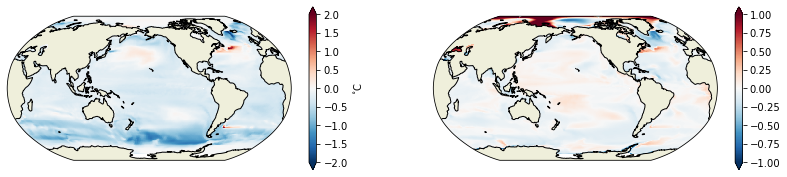

In [29]:
sst_sss(ds_omon_04_rm.sel(time=slice('1891','1920')), ds_omon_pi_rm)
plt.savefig('sst_sss_04-pi.png', bbox_inches='tight', dpi=300)

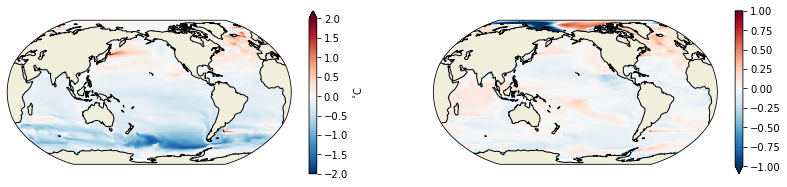

In [30]:
sst_sss(ds_omon_01_rm.sel(time=slice('1891','1920')), ds_omon_fs_rm)

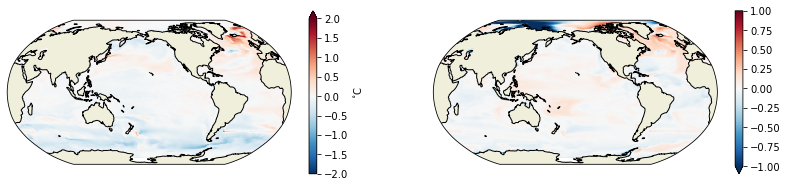

In [31]:
sst_sss(ds_omon_02_rm.sel(time=slice('1891','1920')), ds_omon_fs_rm)

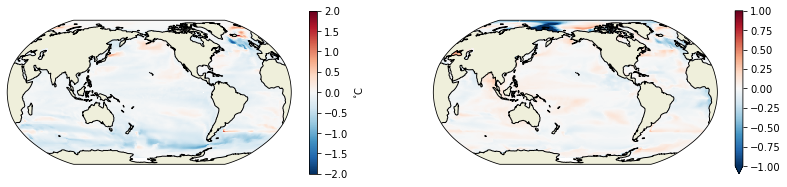

In [32]:
sst_sss(ds_omon_03_rm.sel(time=slice('1891','1920')), ds_omon_fs_rm)

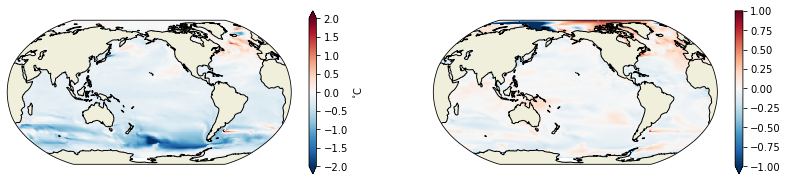

In [55]:
sst_sss(ds_omon_fas_rm.sel(time=slice('5621','5650')), ds_omon_fs_rm)

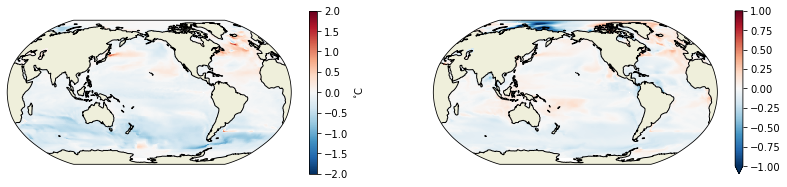

In [34]:
sst_sss(ds_omon_fa02_rm.sel(member_id='r2i1p2f1').sel(time=slice('1891','1920')), ds_omon_fs_rm)

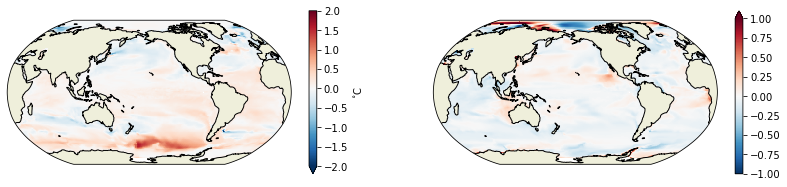

In [35]:
sst_sss(ds_omon_fa02_rm.sel(member_id='r2i1p2f1').sel(time=slice('1891','1920')), 
        ds_omon_01_rm.sel(time=slice('1891','1920')))

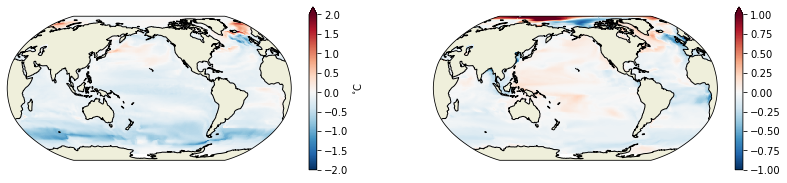

In [36]:
sst_sss(ds_omon_fa03_rm.sel(member_id='r3i1p2f1').sel(time=slice('1891','1920')), ds_omon_fs_rm)

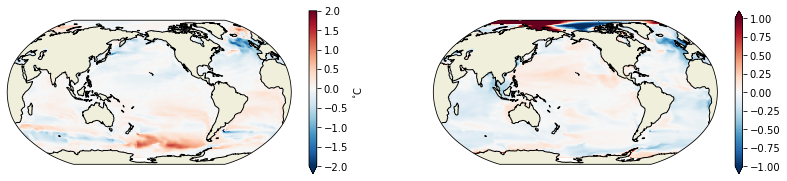

In [37]:
sst_sss(ds_omon_fa03_rm.sel(member_id='r3i1p2f1').sel(time=slice('1891','1920')), 
        ds_omon_01_rm.sel(time=slice('1891','1920')))

In [63]:
def ts_sec(ds_exp, ds_ctl):
    fig, (axl, axr) = plt.subplots(1,2, figsize=(14,6), sharex=True, sharey=True)
    cmap = mpl.cm.get_cmap("RdBu_r").copy()
    cmap.set_bad([0.5,0.5,0.5])

    (ds_exp.sel(time=slice('1920','1950')).mean(dim='time').mean(dim='lon') - 
     ds_ctl.mean(dim='time').mean(dim='lon')).thetao.plot(ax=axl, cmap=cmap, vmin=-1, vmax=1)

    (ds_exp.sel(time=slice('1920','1950')).mean(dim='time').mean(dim='lon') - 
     ds_ctl.mean(dim='time').mean(dim='lon')).so.plot(ax=axr,vmin=-0.2, vmax=0.2,cmap=cmap)
    plt.gca().invert_yaxis()

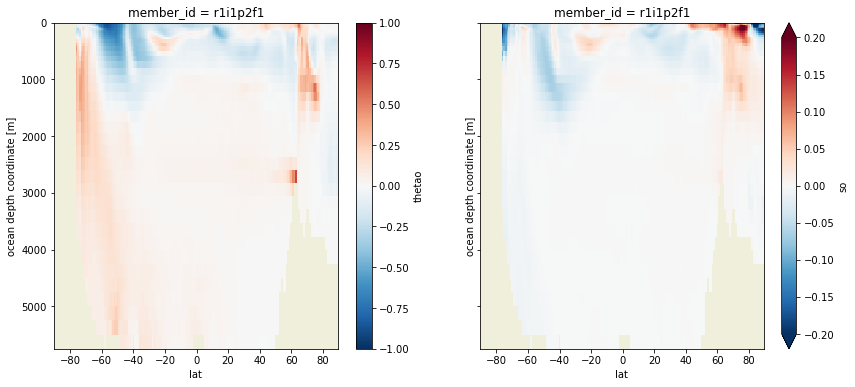

In [39]:
ts_sec(ds_omon_01_rm, ds_omon_fs_rm)

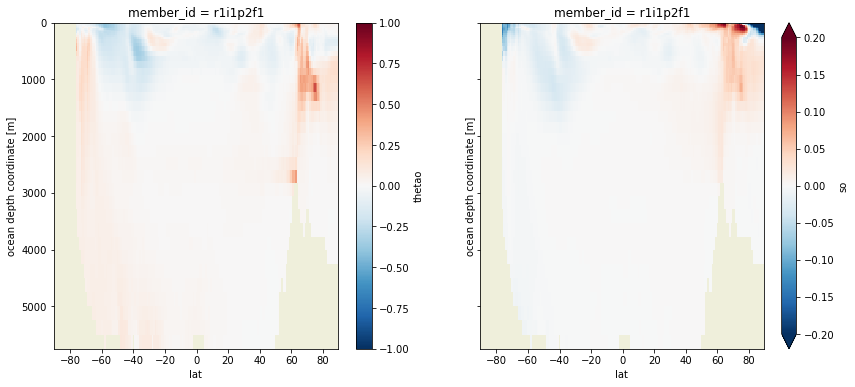

In [40]:
#ts_sec(ds_omon_02_rm, ds_omon_fs_rm)

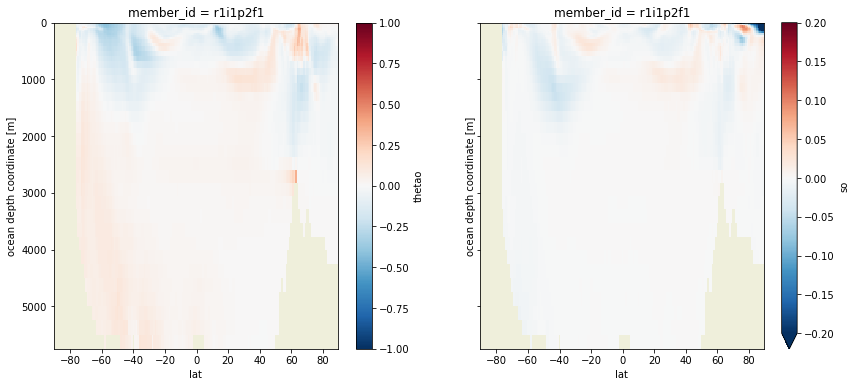

In [41]:
#ts_sec(ds_omon_03_rm, ds_omon_fs_rm)

In [ ]:
ts_sec(ds_omon_04_rm, ds_omon_pi_rm)
plt.savefig('ts_sec_04-pi.png', bbox_inches='tight', dpi=300)

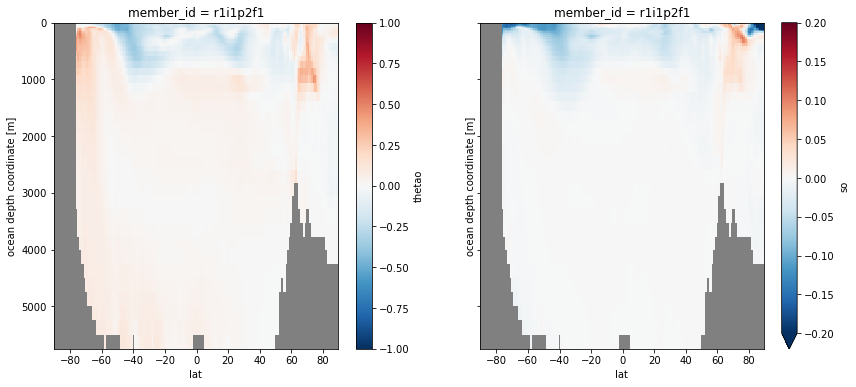

In [64]:
ts_sec(ds_omon_fa02_rm.sel(member_id='r2i1p2f1'), ds_omon_fs_rm)
plt.savefig('ts_sec_fa02-pi.png', bbox_inches='tight', dpi=300)

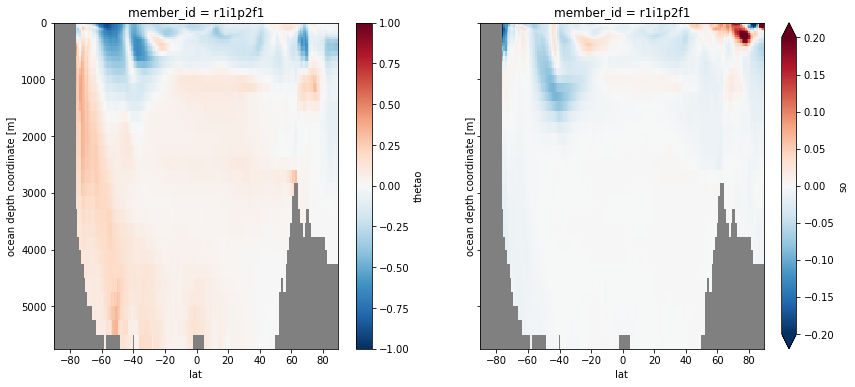

In [65]:
ts_sec(ds_omon_fas_rm.sel(member_id='r1i1p2f1'), ds_omon_fs_rm)
plt.savefig('ts_sec_fas-fs.png', bbox_inches='tight', dpi=300)

In [ ]:
ts_sec(ds_omon_fa03_rm.sel(member_id='r3i1p2f1'), ds_omon_fs_rm)
plt.savefig('ts_sec_fa03-pi.png', bbox_inches='tight', dpi=300)

In [45]:
#ts_sec(ds_omon_fa02_rm.sel(member_id='r2i1p2f1'), ds_omon_01_rm)

In [46]:
#ts_sec(ds_omon_fa03_rm.sel(member_id='r3i1p2f1'), ds_omon_01_rm)

In [47]:
def tas_pr_map(ds_exp, ds_ctl):
    fig, (axl, axr) = plt.subplots(1,2, figsize=(14,6), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=200)))
    ( ds_exp.sel(time=slice('1891','1920')).mean(dim='time') -
     ds_ctl.mean(dim='time')).tas.plot(ax=axl, transform=ccrs.PlateCarree(), cbar_kwargs=dict(shrink=0.5))

    ( ds_exp.sel(time=slice('1891','1920')).mean(dim='time') -
     ds_ctl.mean(dim='time')).pr.plot(ax=axr, transform=ccrs.PlateCarree(), cbar_kwargs=dict(shrink=0.5))

    for ax in [axl, axr]:
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.set_global()

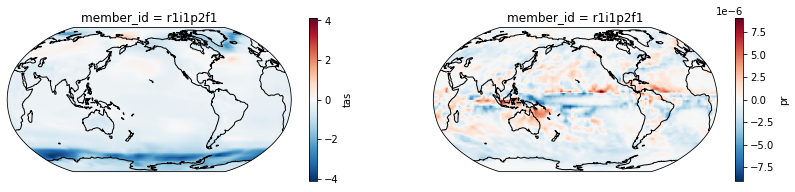

In [48]:
tas_pr_map(ds_amon_04_rm, ds_amon_pi_rm)

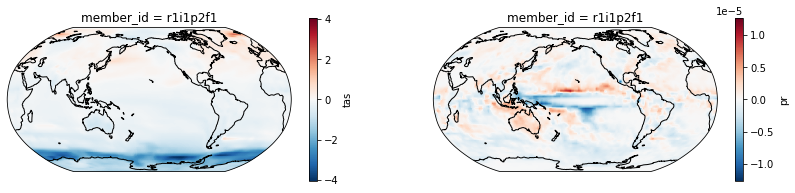

In [49]:
tas_pr_map(ds_amon_01_rm, ds_amon_fs_rm)

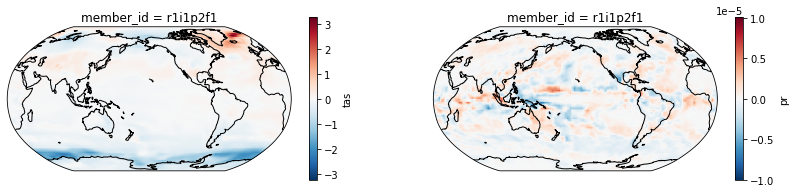

In [50]:
tas_pr_map(ds_amon_02_rm, ds_amon_fs_rm)

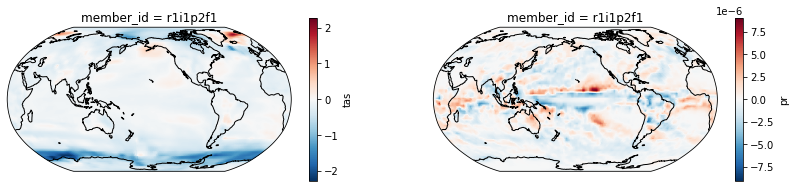

In [51]:
tas_pr_map(ds_amon_03_rm, ds_amon_fs_rm)

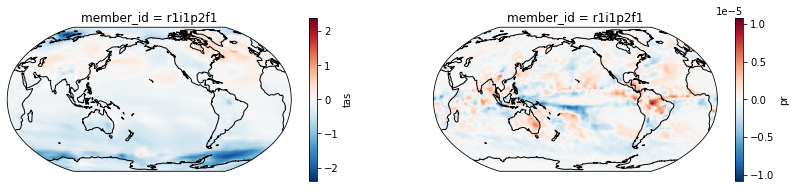

In [52]:
tas_pr_map(ds_amon_fa02_rm.sel(member_id='r2i1p2f1'), ds_amon_fs_rm)

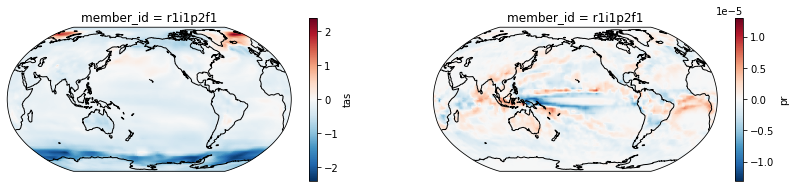

In [53]:
tas_pr_map(ds_amon_fa03_rm.sel(member_id='r3i1p2f1'), ds_amon_fs_rm)

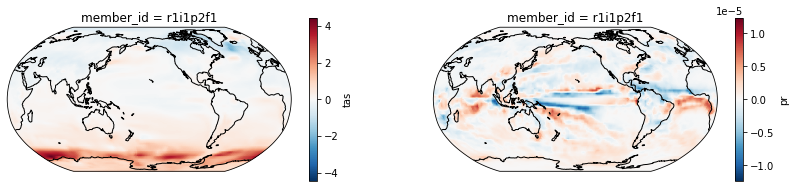

In [54]:
tas_pr_map(ds_amon_fa03_rm.sel(member_id='r3i1p2f1'), ds_amon_04_rm)